In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [2]:
df = pd.read_csv("iris.csv")

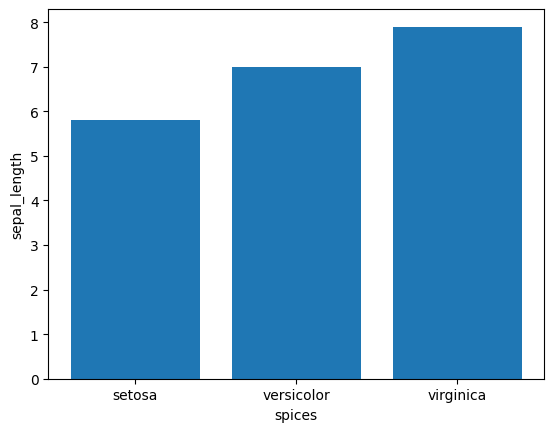

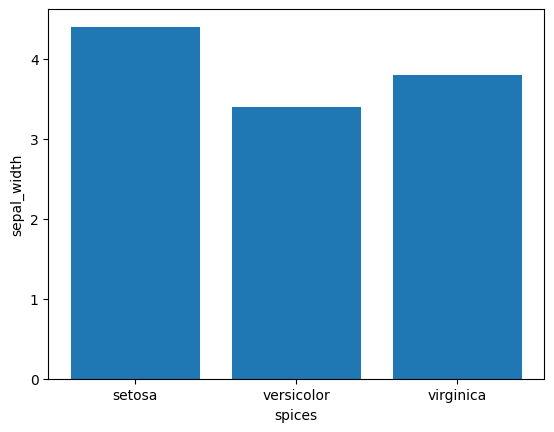

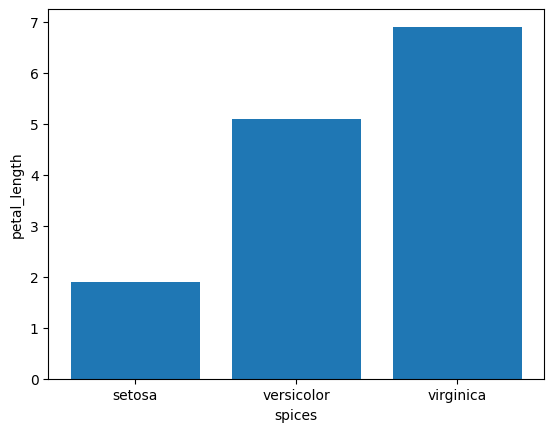

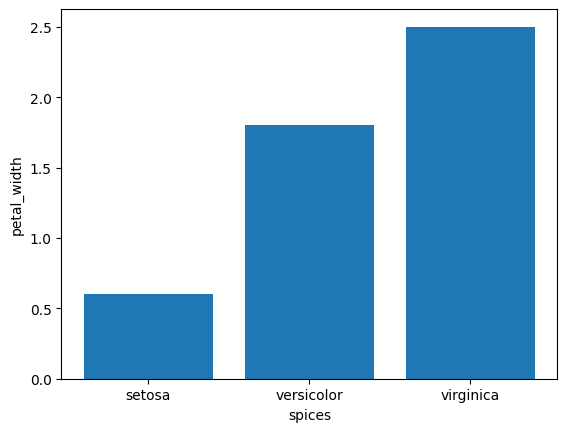

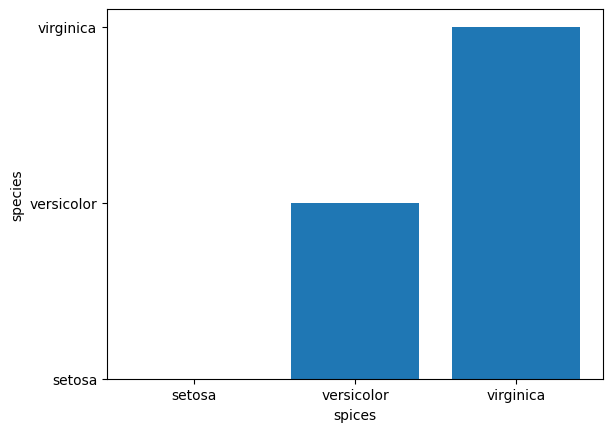

In [3]:
for i in df.columns:
    plt.bar(df["species"],df[i])
    plt.xlabel("spices")
    plt.ylabel(i)
    plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
ds_low = df[(df['species']=="setosa")]
ds_average = df[(df['species']=="versicolor")]
ds_high = df[(df['species']=="virginica")]
# upsample minority class
ds_average_upsampled = resample(ds_average,
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results
ds_low_upsampled = resample(ds_low,
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_new = pd.concat([ds_average_upsampled,ds_low_upsampled, ds_high])

In [36]:
df_new

,sepal_length,sepal_width,petal_length,petal_width,species
88,5.6,3.0,4.1,1.3,versicolor
78,6.0,2.9,4.5,1.5,versicolor
64,5.6,2.9,3.6,1.3,versicolor
92,5.8,2.6,4.0,1.2,versicolor
57,4.9,2.4,3.3,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
df.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [38]:
df.duplicated().sum()

1

In [39]:
x = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

In [41]:
Y.ndim

1

In [42]:
y_new = Y.reshape(-1,1)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
model_knn = KNeighborsClassifier()

In [47]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
y_train_pred_knn = model_knn.predict(x_train)

In [54]:
len(y_train_pred_knn)

105

In [55]:
print("Accuracy : ", accuracy_score(y_train, y_train_pred_knn))

Accuracy :  0.9523809523809523


In [30]:
print("Accuracy:",accuracy_score(y_train,y_train_pred_knn))

Accuracy: 0.9523809523809523


In [1]:
model_rf.fit(x_train,y_train)

NameError: name 'model_rf' is not defined